### *Theoretical* 

### 1. Can we use Bagging for regression problems?
Yes, Bagging can be used for regression problems. A **Bagging Regressor** (like `sklearn.ensemble.BaggingRegressor`) trains multiple regression models on different subsets of the training data and averages their predictions to improve stability and reduce variance.

### 2. What is the difference between multiple model training and single model training?
- **Single Model Training:** A single model (e.g., a decision tree) is trained on the entire dataset, and its performance depends solely on that model.
- **Multiple Model Training (Ensemble Learning):** Multiple models are trained, and their predictions are combined to improve accuracy, reduce overfitting, and enhance robustness.

### 3. Explain the concept of feature randomness in Random Forest.
Random Forest introduces **feature randomness** by selecting a random subset of features at each split of a decision tree. This helps in decorrelating the trees, leading to better generalization and reduced overfitting.

### 4. What is OOB (Out-of-Bag) Score?
OOB score is an **internal validation score** in Bagging-based models like Random Forest. Since each tree is trained on a bootstrap sample (random subset with replacement), some data points are left out. These **left-out samples** are used to evaluate the model, reducing the need for separate cross-validation.

### 5. How can you measure the importance of features in a Random Forest model?
Feature importance in Random Forest can be measured using:
- **Mean Decrease in Impurity (MDI):** Measures how much each feature contributes to reducing impurity (Gini/Entropy).
- **Permutation Importance:** Randomly shuffles feature values and observes the impact on model performance.

### 6. Explain the working principle of a Bagging Classifier.
A **Bagging Classifier** (e.g., `BaggingClassifier` in sklearn) works by:
1. Generating multiple bootstrap samples from the training dataset.
2. Training a base classifier (e.g., decision tree) on each sample.
3. Combining predictions using majority voting (for classification) or averaging (for regression).

### 7. How do you evaluate a Bagging Classifier’s performance?
Performance evaluation can be done using:
- **Accuracy, Precision, Recall, F1-score (for classification).**
- **AUC-ROC (for probabilistic classifiers).**
- **Cross-validation or Out-of-Bag (OOB) score** for unbiased performance estimation.

### 8. How does a Bagging Regressor work?
A **Bagging Regressor**:
1. Trains multiple regression models on different bootstrap samples.
2. Averages the predictions of all models to reduce variance and improve generalization.

### 9. What is the main advantage of ensemble techniques?
The main advantage is **improved performance** through:
- Reduced variance (Bagging)
- Reduced bias (Boosting)
- Improved generalization and robustness.

### 10. What is the main challenge of ensemble methods?
The key challenges include:
- Increased computational cost.
- Difficult interpretability.
- Risk of overfitting in some cases (especially in Boosting).

### 11. Explain the key idea behind ensemble techniques.
Ensemble methods combine multiple weak learners to create a strong learner, leveraging diversity in models to improve performance and reduce overfitting.

### 12. What is a Random Forest Classifier?
A **Random Forest Classifier** is an ensemble of decision trees trained on different subsets of the data, using feature randomness to improve generalization. It aggregates predictions via majority voting.

### 13. What are the main types of ensemble techniques?
- **Bagging (Bootstrap Aggregating)**: Reduces variance (e.g., Random Forest).
- **Boosting**: Reduces bias by sequential training (e.g., AdaBoost, Gradient Boosting).
- **Stacking**: Uses multiple base learners and a meta-learner.

### 14. What is ensemble learning in machine learning?
Ensemble learning is a technique where multiple models are combined to achieve better predictive performance than individual models.

### 15. When should we avoid using ensemble methods?
- When a single model is already performing well.
- When interpretability is crucial.
- When computational resources are limited.

### 16. How does Bagging help in reducing overfitting?
Bagging reduces overfitting by training models on **random subsets of data** and averaging predictions, which smooths out noise and reduces variance.

### 17. Why is Random Forest better than a single Decision Tree?
- More robust and less sensitive to noise.
- Reduces overfitting by averaging multiple trees.
- Handles missing values and feature importance well.

### 18. What is the role of bootstrap sampling in Bagging?
Bootstrap sampling creates different training sets by randomly sampling **with replacement**, ensuring diversity among base models and improving generalization.

### 19. What are some real-world applications of ensemble techniques?
- **Fraud Detection** (Boosting for anomaly detection)
- **Medical Diagnosis** (Random Forest for disease prediction)
- **Finance** (Stock price prediction)
- **Image Recognition** (Ensembles in CNNs)

### 20. What is the difference between Bagging and Boosting?
| Feature  | Bagging | Boosting |
|----------|---------|---------|
| Purpose | Reduce variance | Reduce bias |
| Training | Parallel | Sequential |
| Weak Learners | Independent | Dependent |
| Overfitting | Less prone | More prone |
| Example | Random Forest | AdaBoost, XGBoost |



### **Practical**

In [10]:
# 21.	Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base estimator (Decision Tree)
estimator = DecisionTreeClassifier()

# ✅ Use 'estimator' instead of 'base_estimator'
bagging_clf = BaggingClassifier(estimator=estimator, n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.2f}")


Bagging Classifier Accuracy: 1.00


In [13]:
# 22.	 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE) 

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base estimator (Decision Tree Regressor)
estimator = DecisionTreeRegressor()

# ✅ Use 'estimator' instead of 'base_estimator'
bagging_reg = BaggingRegressor(estimator=estimator, n_estimators=50, random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

# Make predictions
y_pred = bagging_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor MSE: {mse:.2f}")


Bagging Regressor MSE: 0.26


In [15]:
# 23.	Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores 

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names  # Feature names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")

# Get feature importance scores
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("\nFeature Importance Scores:")
print(feature_importance_df)


Random Forest Classifier Accuracy: 0.96

Feature Importance Scores:
                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        co

In [17]:
# 24.	Train a Random Forest Regressor and compare its performance with a single Decision Tree 

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)  # Train Decision Tree
dt_y_pred = dt_regressor.predict(X_test)  # Predict with Decision Tree
dt_mse = mean_squared_error(y_test, dt_y_pred)  # Compute MSE for Decision Tree

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)  # Train Random Forest
rf_y_pred = rf_regressor.predict(X_test)  # Predict with Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)  # Compute MSE for Random Forest

# Print comparison results
print(f"Decision Tree Regressor MSE: {dt_mse:.2f}")
print(f"Random Forest Regressor MSE: {rf_mse:.2f}")


Decision Tree Regressor MSE: 0.50
Random Forest Regressor MSE: 0.26


In [19]:
# 25.	Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier with OOB enabled
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train the model (OOB score is computed during training)
rf_clf.fit(X_train, y_train)

# Print OOB Score
print(f"Out-of-Bag (OOB) Score: {rf_clf.oob_score_:.4f}")



Out-of-Bag (OOB) Score: 0.9560


In [21]:
# 26.	Train a Bagging Classifier using SVM as a base estimator and print accuracy 


from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base estimator (SVM)
svm_estimator = SVC()

# Initialize Bagging Classifier with SVM as base estimator
bagging_clf = BaggingClassifier(estimator=svm_estimator, n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier (SVM) Accuracy: {accuracy:.2f}")


Bagging Classifier (SVM) Accuracy: 1.00


In [23]:
# 27.	Train a Random Forest Classifier with different numbers of trees and compare accuracy 

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of different numbers of trees to test
n_trees = [1, 10, 50, 100, 200]

# Train and evaluate models with different numbers of trees
for n in n_trees:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest with {n} trees - Accuracy: {accuracy:.4f}")


Random Forest with 1 trees - Accuracy: 0.9386
Random Forest with 10 trees - Accuracy: 0.9561
Random Forest with 50 trees - Accuracy: 0.9649
Random Forest with 100 trees - Accuracy: 0.9649
Random Forest with 200 trees - Accuracy: 0.9649


In [29]:
# 28.	Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score 

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base estimator (Logistic Regression)
logistic_estimator = LogisticRegression(max_iter=1000, solver='liblinear')

# Initialize Bagging Classifier with Logistic Regression
bagging_clf = BaggingClassifier(estimator=logistic_estimator, n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict probability estimates
y_prob = bagging_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"Bagging Classifier (Logistic Regression) AUC Score: {auc_score:.4f}")



Bagging Classifier (Logistic Regression) AUC Score: 0.9974


In [27]:
# 29.	Train a Random Forest Regressor and analyze feature importance scores 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names  # Feature names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Regressor MSE: {mse:.2f}")

# Get feature importance scores
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("\nFeature Importance Scores:")
print(feature_importance_df)


Random Forest Regressor MSE: 0.26

Feature Importance Scores:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


In [31]:
# 30.	Train an ensemble model using both Bagging and Random Forest and compare accuracy. 

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=50, 
    random_state=42
)

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train Bagging model
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
bagging_acc = accuracy_score(y_test, y_pred_bagging)

# Train Random Forest model
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Print accuracy comparison
print(f"Bagging Classifier Accuracy: {bagging_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Bagging Classifier Accuracy: 0.9561
Random Forest Accuracy: 0.9649


In [33]:
# 31.	Train a Random Forest Classifier and tune hyperparameters using GridSearchCV .
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [None, 10, 20],           # Tree depth
    'min_samples_split': [2, 5, 10]        # Minimum samples required to split a node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy', 
    n_jobs=-1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Accuracy: 0.9649


Bagging Regressor (n_estimators=10) MSE: 0.2824
Bagging Regressor (n_estimators=50) MSE: 0.2573
Bagging Regressor (n_estimators=100) MSE: 0.2559
Bagging Regressor (n_estimators=200) MSE: 0.2541
Bagging Regressor (n_estimators=300) MSE: 0.2538


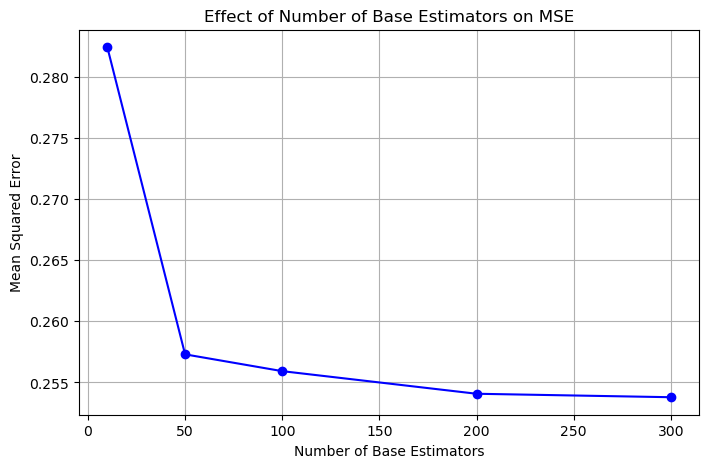

In [36]:
# 32.	Train a Bagging Regressor with different numbers of base estimators and compare performance 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of base estimators to test
n_estimators_list = [10, 50, 100, 200, 300]

# Store results
mse_scores = []

# Train Bagging Regressor for different numbers of estimators
for n in n_estimators_list:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(),  # <-- Updated parameter
        n_estimators=n, 
        random_state=42
    )
    bagging_reg.fit(X_train, y_train)
    
    # Predict and calculate MSE
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    print(f"Bagging Regressor (n_estimators={n}) MSE: {mse:.4f}")

# Plot performance
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Base Estimators")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Number of Base Estimators on MSE")
plt.grid()
plt.show()


In [37]:
# 33.	Train a Random Forest Classifier and analyze misclassified samples 

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Identify misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

# Create a DataFrame to analyze misclassified samples
misclassified_df = pd.DataFrame({
    "Index": misclassified_indices,
    "Actual Label": y_test[misclassified_indices],
    "Predicted Label": y_pred[misclassified_indices]
})

print("\nMisclassified Samples:")
print(misclassified_df)


Random Forest Accuracy: 0.9649

Misclassified Samples:
   Index  Actual Label  Predicted Label
0      8             1                0
1     20             0                1
2     77             0                1
3     82             0                1


In [38]:
# 34.	Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier 

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Train a Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=50, 
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Print results
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

# Compare performance
improvement = (accuracy_bagging - accuracy_dt) * 100
print(f"Bagging improves accuracy by {improvement:.2f}%")


Decision Tree Accuracy: 0.9474
Bagging Classifier Accuracy: 0.9561
Bagging improves accuracy by 0.88%


Random Forest Accuracy: 0.9649


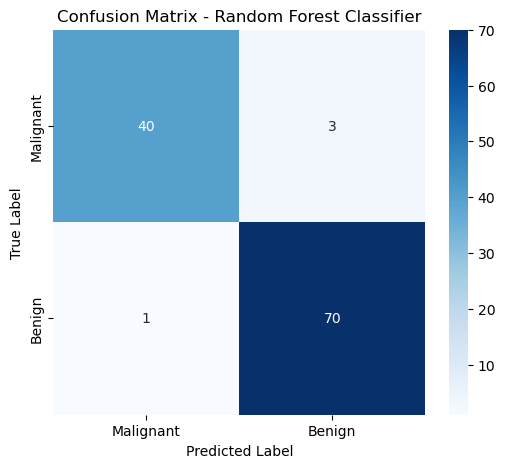

In [39]:
# 35.	Train a Random Forest Classifier and visualize the confusion matrix 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


🔹 Top 5 Most Important Features in Random Forest:
             Feature  Importance (%)
          worst area       15.389236
worst concave points       14.466327
 mean concave points       10.620999
        worst radius        7.798688
      mean concavity        6.800084


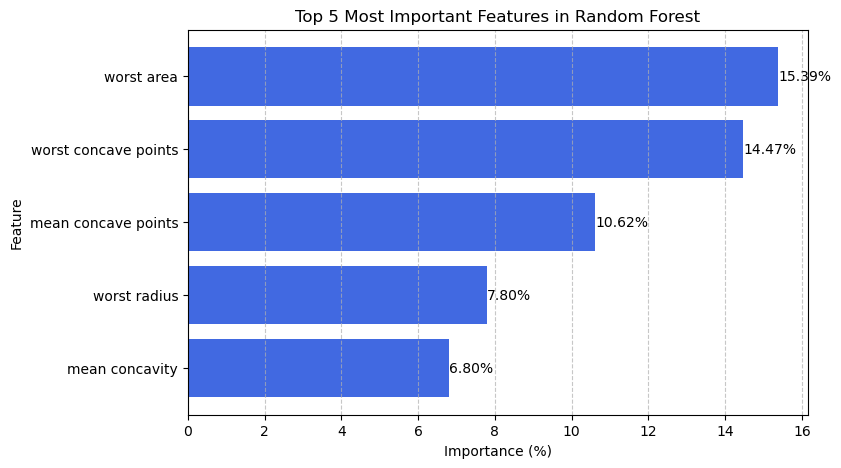

In [48]:
# 36.	Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importances and normalize them
feature_importances = rf_clf.feature_importances_
feature_importances = feature_importances / feature_importances.sum() * 100  # Convert to percentage

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance (%)": feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by="Importance (%)", ascending=False)

# Print the top 5 features
print("🔹 Top 5 Most Important Features in Random Forest:")
print(feature_df.head(5).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(8, 5))
bars = plt.barh(feature_df["Feature"][:5], feature_df["Importance (%)"][:5], color="royalblue")
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.title("Top 5 Most Important Features in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add value labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}%", va="center")

plt.show()


Top 5 Most Important Features in Random Forest:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


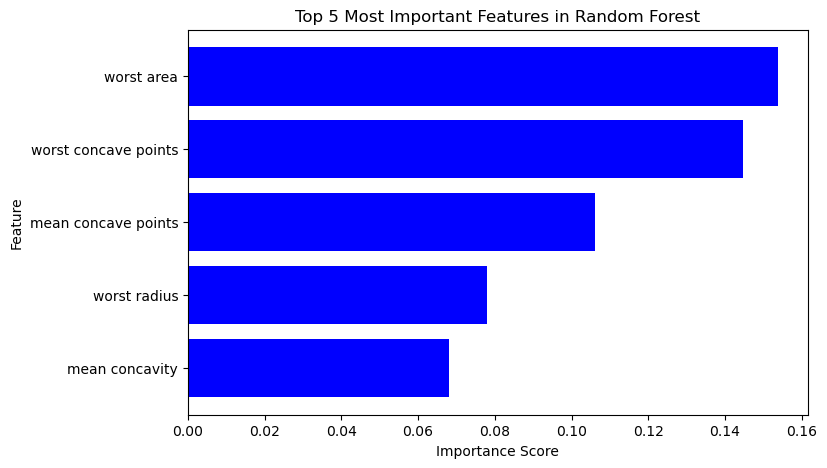

In [46]:
# 37.	Train a Random Forest Classifier and print the top 5 most important features 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Print the top 5 features
print("Top 5 Most Important Features in Random Forest:")
print(feature_df.head(5))

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_df["Feature"][:5], feature_df["Importance"][:5], color="b")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 5 Most Important Features in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


In [50]:
# 38.	Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score 
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Compute Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1-score: {f1:.4f}")

# Print full classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Precision: 0.9583
🔹 Recall: 0.9718
🔹 F1-score: 0.9650

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Max Depth: 1, Train Accuracy: 0.9253, Test Accuracy: 0.9561
Max Depth: 2, Train Accuracy: 0.9538, Test Accuracy: 0.9649
Max Depth: 3, Train Accuracy: 0.9824, Test Accuracy: 0.9649
Max Depth: 5, Train Accuracy: 0.9934, Test Accuracy: 0.9649
Max Depth: 10, Train Accuracy: 1.0000, Test Accuracy: 0.9649
Max Depth: 15, Train Accuracy: 1.0000, Test Accuracy: 0.9649
Max Depth: 20, Train Accuracy: 1.0000, Test Accuracy: 0.9649
Max Depth: None, Train Accuracy: 1.0000, Test Accuracy: 0.9649


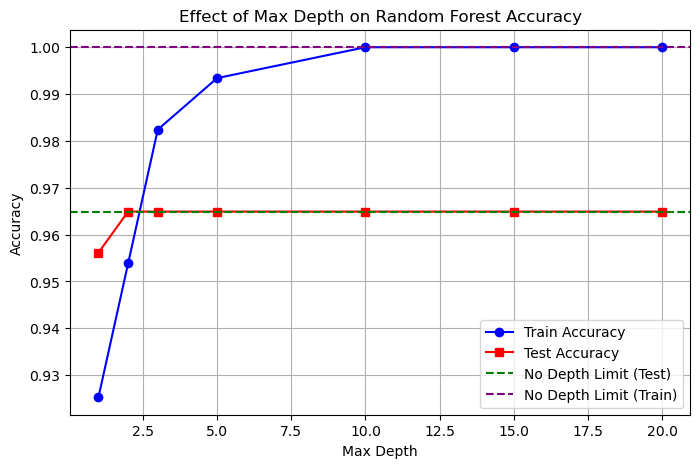

In [52]:
# 39.	Train a Random Forest Classifier and analyze the effect of max_depth on accuracy 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of max_depth values to test
max_depth_values = [1, 2, 3, 5, 10, 15, 20, None]  # None means no depth limit

# Store accuracy results
train_accuracies = []
test_accuracies = []

# Train Random Forest with different max_depth values
for depth in max_depth_values:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_clf.fit(X_train, y_train)
    
    # Compute accuracy on train and test sets
    train_acc = accuracy_score(y_train, rf_clf.predict(X_train))
    test_acc = accuracy_score(y_test, rf_clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"Max Depth: {depth}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Plot accuracy vs. max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values[:-1], train_accuracies[:-1], marker='o', linestyle='-', label="Train Accuracy", color='blue')
plt.plot(max_depth_values[:-1], test_accuracies[:-1], marker='s', linestyle='-', label="Test Accuracy", color='red')

plt.axhline(y=test_accuracies[-1], color='green', linestyle='--', label="No Depth Limit (Test)")
plt.axhline(y=train_accuracies[-1], color='purple', linestyle='--', label="No Depth Limit (Train)")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Max Depth on Random Forest Accuracy")
plt.legend()
plt.grid()
plt.show()


Bagging Regressor (Decision Tree) MSE: 0.2573
Bagging Regressor (K-Neighbors) MSE: 1.0763


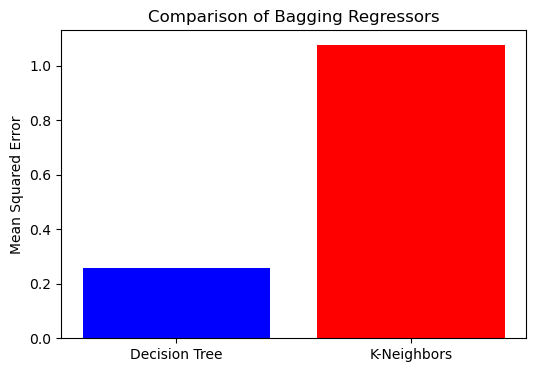

In [54]:
# 40.	Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
dt_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor()

# Train Bagging Regressors
bagging_dt = BaggingRegressor(estimator=dt_regressor, n_estimators=50, random_state=42)
bagging_knn = BaggingRegressor(estimator=knn_regressor, n_estimators=50, random_state=42)

# Fit models
bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

# Predict
y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

# Compute Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print results
print(f"Bagging Regressor (Decision Tree) MSE: {mse_dt:.4f}")
print(f"Bagging Regressor (K-Neighbors) MSE: {mse_knn:.4f}")

# Compare performances visually
models = ["Decision Tree", "K-Neighbors"]
mse_scores = [mse_dt, mse_knn]

plt.figure(figsize=(6, 4))
plt.bar(models, mse_scores, color=['blue', 'red'])
plt.ylabel("Mean Squared Error")
plt.title("Comparison of Bagging Regressors")
plt.show()


Random Forest Classifier ROC-AUC Score: 0.9953


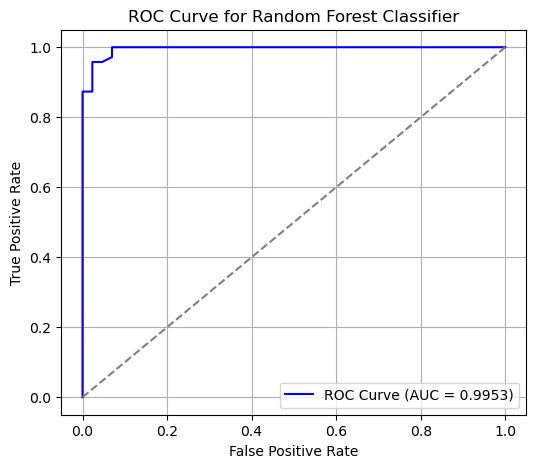

In [56]:
# 41.	Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probability estimates
y_prob = rf_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC-AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"Random Forest Classifier ROC-AUC Score: {auc_score:.4f}")

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend()
plt.grid()
plt.show()


In [58]:
# 42.	Train a Bagging Classifier and evaluate its performance using cross-validatio. 

import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Initialize Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=50, 
    random_state=42
)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(bagging_clf, X, y, cv=cv, scoring="accuracy")

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")



Cross-Validation Accuracy Scores: [0.96491228 0.92982456 0.96491228 0.96491228 0.96460177]
Mean Accuracy: 0.9578
Standard Deviation: 0.0140


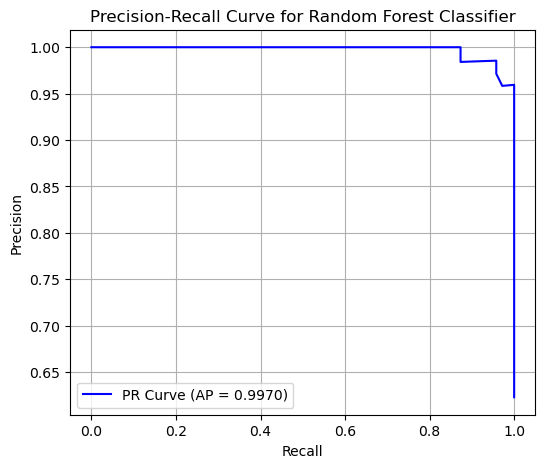

In [60]:
# 43.	Train a Random Forest Classifier and plot the Precision-Recall curv .

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probability estimates
y_prob = rf_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest Classifier")
plt.legend()
plt.grid()
plt.show()


In [69]:
# 44.	Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy 

import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data (especially for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, solver="liblinear"))
]

# Define meta-model (Logistic Regression)
stacking_clf = StackingClassifier(
    estimators=base_models, 
    final_estimator=LogisticRegression(), 
    cv=StratifiedKFold(5)  # Better cross-validation strategy
)

# Train Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predictions
y_pred_stacking = stacking_clf.predict(X_test)

# Compute accuracy
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)

# Train and evaluate individual models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

lr_clf = LogisticRegression(max_iter=1000, solver="liblinear")
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Print accuracy comparison
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")



Random Forest Accuracy: 0.9649
Logistic Regression Accuracy: 0.9737
Stacking Classifier Accuracy: 0.9737


Bagging Regressor (max_samples=0.2) MSE: 0.2897
Bagging Regressor (max_samples=0.4) MSE: 0.2687
Bagging Regressor (max_samples=0.6) MSE: 0.2598
Bagging Regressor (max_samples=0.8) MSE: 0.2599
Bagging Regressor (max_samples=1.0) MSE: 0.2559


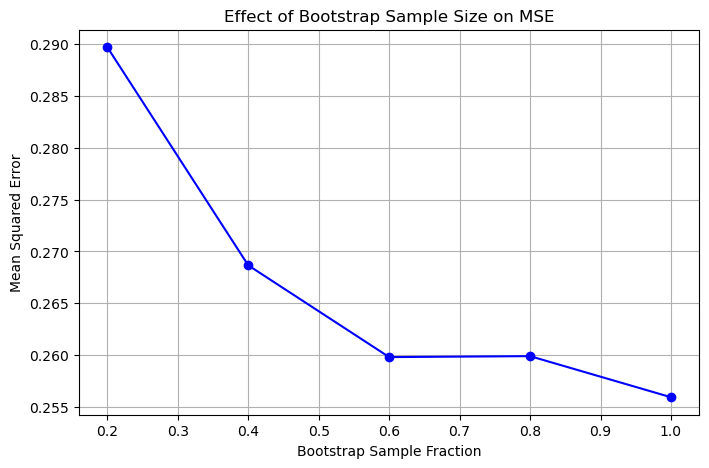

In [68]:
# 45.	Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different bootstrap sample fractions
bootstrap_samples = [0.2, 0.4, 0.6, 0.8, 1.0]

# Store results
mse_scores = []

# Train Bagging Regressor with different bootstrap sample sizes
for bootstrap_fraction in bootstrap_samples:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(), 
        n_estimators=100, 
        max_samples=bootstrap_fraction,  # Adjust bootstrap sample fraction
        random_state=42
    )
    
    bagging_reg.fit(X_train, y_train)
    
    # Predict and calculate MSE
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    print(f"Bagging Regressor (max_samples={bootstrap_fraction}) MSE: {mse:.4f}")

# Plot performance
plt.figure(figsize=(8, 5))
plt.plot(bootstrap_samples, mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Bootstrap Sample Fraction")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Bootstrap Sample Size on MSE")
plt.grid()
plt.show()
